# Support Vector Machine (SVM)

- 딥러닝 이전에 분류에서 뛰어난 성능으로 가장 활용도가 높았던 분류모델
- 하나의 분류 그룹을 다른 그룹과 분리하는 최적의 경계를 찾아내는 알고리즘
- 중간크기의 데이터셋과 특성(Feature)가 많은 복잡한 데이터셋에서 성능이 좋은 것으로 알려져있다.

**1과 2중 어떤 선이 최적의 분류 선일까?**

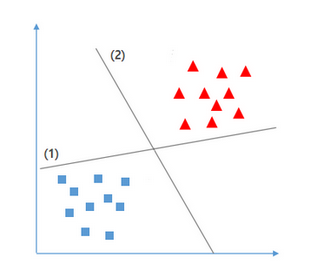

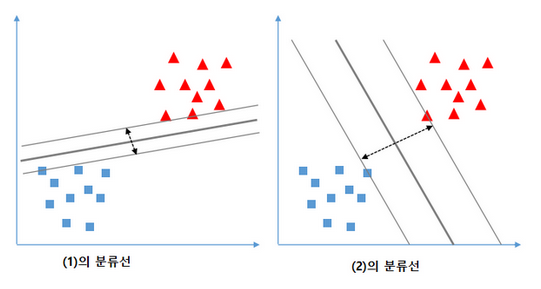

## 목표: support vector간의 가장 넓은 margin을 가지는 초평면(결정경계)를 찾는다.
> ### 초평면
> - 데이터가 존재하는 공간보다 1차원 낮은 부분공간
>    - n차원의 초평면은 n-1차원
>    - 공간을 나누기 위해 초평면을 사용한다.
>    - 1차원-점, 2차원-선, 3차원-평면, 4차원이상 초평면

- Support Vector: 경계를 찾아내는데 기준이 되는 데이터포인트. 초평면(결정경계)에 가장 가까이 있는 vector(데이터포인트)를 말한다.
- margin : 두 support vector간의 너비
- margin이 넓은 결정경계를 만드는 함수를 찾는 것.


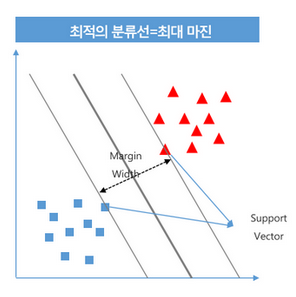

## Soft Margin (<-> Hard Margin: 오차허용안함 - 과적합의 문제가 생길 수 있음)
- Overfitting(과적합)을 방지하기 위해 어느정도 오차를 허용하는 방식을 Soft margin이라고 한다.
- 모든 데이터셋이 위 그림 처럼 완전히 분류 되는 것은 아니다.
- 노이즈가 있는 데이터나 선형적으로 분리 되지 않는 경우 하이퍼파마미터인 C 조정해 마진을 변경한다.
- C (값이 작을수록 soft margin이 됨)
    - 기본값 1
    - 파라미터값을 크게주면 마진폭이 좁아져 마진 오류가 작아지나 Overfitting이 일어날 가능성이 크다.
    - 파라미터값을 작게 주면 마진폭이 넓어져 마진 오류가 크다. 훈련데이터에서는 성능이 안좋아지나 일반화(generalization)되어 테스트 데이터의 성능이 올라간다. 그러나 underfitting 이 날 가능성이 있다.


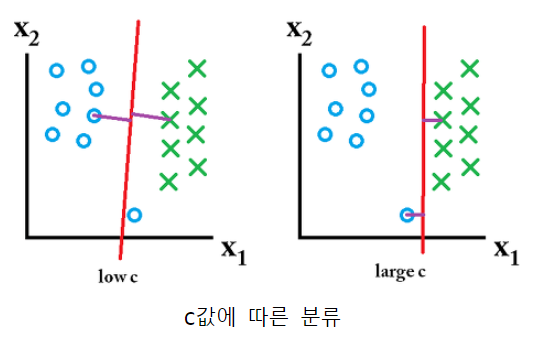

##  svm 예제

In [2]:
# 위스콘신 유방암 data set - 1: 악성종양, 0: 양성종양
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cancer=load_breast_cancer()
X=cancer.data
y=cancer.target

In [4]:
X.shape, y.shape

((569, 30), (569,))

In [7]:
# train/test set분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)  # 데이터 양에 따라 test_size 조절(기본 0.25)

In [11]:
# SVM 모델은 feature(컬럼)간 스케일에 영향을 많이 받는다.
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
# scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
from sklearn.svm import SVC
# 모델 생성
svc=SVC(kernel='linear')  # or svm.LinearSVC

In [13]:
# 학습
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
# 예측
pred_train=svc.predict(X_train)
pred_test=svc.predict(X_test)

In [15]:
# 검증
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9714285714285714, 0.9649122807017544)

In [17]:
# scale
svc=SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)
pred_train_scaled=svc.predict(X_train_scaled)
pred_test_scaled=svc.predict(X_test_scaled)

In [18]:
accuracy_score(y_train, pred_train_scaled), accuracy_score(y_test, pred_test_scaled)

(0.9824175824175824, 0.9736842105263158)

In [19]:
from sklearn.metrics import classification_report, roc_auc_score
report=classification_report(y_train, pred_train_scaled)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       170
           1       0.97      1.00      0.99       285

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [21]:
report=classification_report(y_test, pred_test_scaled)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [22]:
roc_auc_score(y_train, pred_train_scaled)

0.9764705882352941

In [23]:
roc_auc_score(y_test, pred_test_scaled)

0.9692460317460316

## 비선형 SVM
- 선형으로 분리가 안되는 경우는?
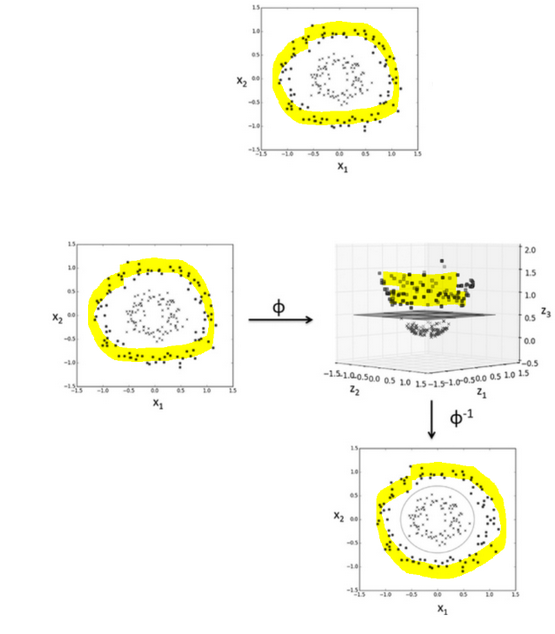

![svm5](images/02_ml/svm_05.png)
- 선형으로 분리가 안되는 경우 데이터를 선형으로 분리하기 위해 Kernel Trick 을 이용해 적은 계산량으로 처리한다.
- Kernel Trick은 차원을 늘려 처리하는 것을 말한다.